# Ilustración del Teorema del Límite Central

Este cuaderno presenta un ejemplo que ilustra el teorema del límite central.

Supongamos que un jugador se ubica en la línea central de un campo de futbol. Sucesivamente, lanzamos una moneda al aire. Si sale *escudo*, avanza un metro hacia la portería rival, pero si sale *corona*, entonces retrocede un metro. Es decir, en cada paso $i$ su movimiento es una variable aleatoria $X_i$ con probabilidad 
\begin{equation*}
Prob(X_i) = \begin{cases}
0.5, & \text{si } X_i=1 \quad\text{(escudo)}\\
0.5, & \text{si } X_i=-1\quad\text{(corona)}
\end{cases}
\end{equation*}

Es fácil comprobar que en este caso 
\begin{align*}
E(X_i)   &= 0.5\times-1 + 0.5\times 1 =0 \\
Var(X_i) &= 0.5(-1-0)^2 + 0.5(1-0)^2 = 1
\end{align*}

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import bernoulli, binom, norm
from matplotlib.gridspec import GridSpec

En Python, podemos simular esta variable usando la función bernoulli del paquete `scipy`:

In [2]:
2*bernoulli.rvs(p=0.5)-1

1

La posición del jugador después de lanzar la moneda $n$ veces es entonces:
\begin{equation*}
Y_n = \sum_{i=0}^n X_i
\end{equation*}


Según el Teorema del Límite Central, la distribución de un promedio de variables aleatorias que tiene la misma distribución, una vez normalizados (restando la media y dividiando entre la desviación estándar) y reescalados por la raíz cuadrada de la muestra (en este caso $\sqrt{n}$) tiende a una variable aleatoria normal estándar conforme $n$ tiende a infinito:
\begin{equation*}
Z_n \equiv \frac{\sqrt{n}Y_n}{n} = \frac{\sum_{i=0}^n X_i}{\sqrt{n}}  \sim N(0, 1)
\end{equation*}




In [3]:
GITHUB_REPO = "https://raw.githubusercontent.com/randall-romero/econometria/master/figures/"
DATAPATH = GITHUB_REPO if 'google.colab' in str(get_ipython()) else '../../figures/'

img = plt.imread(DATAPATH + "futbol.jpg")
jugador = 0

Para simular el proceso, ejecutamos repetidamente esta celda, que grafica la posición y lanza la moneda para determinar su posición en la siguiente iteración.

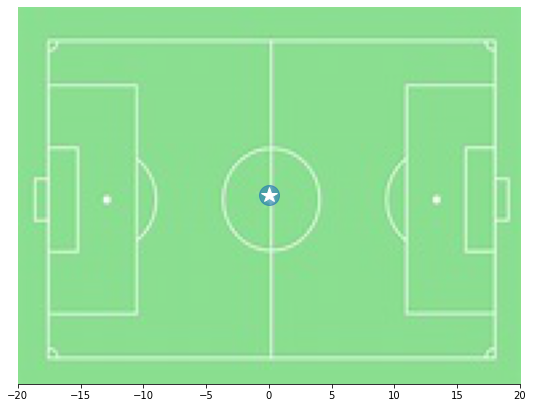

In [4]:
fig, ax = plt.subplots(figsize=[9, 7.5])
ax.imshow(img, extent=[-20, 20, 0, 30], alpha=0.5) # dibujar el campo de juego

ax.plot(jugador, 15, alpha=0.6, color='C0', marker='o', markersize=20) # dibujar al jugador
ax.plot(jugador, 15, color='white', marker='*', markersize=16)

for pos in ['left', 'right', 'top']:
    ax.spines[pos].set_visible(False)
    
ax.set(yticks=[]);

moneda = 2*bernoulli.rvs(p=0.5)-1  # lanzar la moneda al aire
jugador += moneda # cambiar de posición al jugador

Supongamos ahora que repetimos este experimento, con 11 jugadores, y (de momento) 40 lanzamientos de la moneda para cada jugador. En esta figura vemos las posiciones visitadas por cada jugador, así como su posición final (marcada con una estrella). Además, en la parte inferior hacemos un histograma con las posiciones finales de los 11 jugadores.

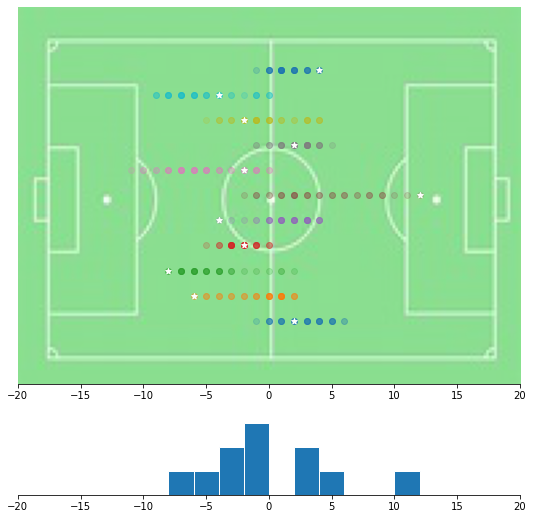

In [5]:
PASOS = 40

def recorrido(n=PASOS):
    pasos = 2*bernoulli.rvs(p=0.5, size=[n])-1
    return pasos.cumsum()

recorridos = np.array([recorrido() for _ in range(11)])
posición_final = recorridos[:,-1]


spec = GridSpec(ncols=1, nrows=2, hspace=0.15, height_ratios=[5, 1])

fig = plt.figure(figsize=[9, 9])
ax0 = fig.add_subplot(spec[0])

ax0.imshow(img, extent=[-20, 20, 0, 30], alpha=0.5)

for k, jugador in enumerate(recorridos):
    ax0.scatter(jugador, np.zeros(PASOS) + 5+2*k, alpha=0.2)
    ax0.scatter(posición_final[k], 5+2*k, color='white', marker='*')

ax1 = fig.add_subplot(spec[1], sharex=ax0)    
ax1.hist(posición_final, edgecolor='white', bins=10);


for pos in ['left', 'right', 'top']:
    ax0.spines[pos].set_visible(False)
    ax1.spines[pos].set_visible(False)
    
ax0.set(yticks=[])
ax1.set(yticks=[]);

## Usando la distribución de Bernoulli

Ahora simulamos este mismo histograma, pero con 10 mil jugadores, y un número grande de lanzamientos de la moneda (2500). Además, superponemos la campana de Gauss para verificar que efectivamente el resultado se aproxima a una distribución normal.

Wall time: 1.74 s


"\n# Esta versión del gráfico sirve para hacer una animación\n\nbottom = np.zeros(nbins)\nfor zchunk in z.reshape([10, -1]):\n    yvals = np.histogram(zchunk, bins=xx, density=False)[0] / N / w\n    ax.bar(xx[:-1], yvals, bottom=bottom, color='C0', edgecolor='C0', align='edge', width=w)\n    bottom += yvals\n\n"

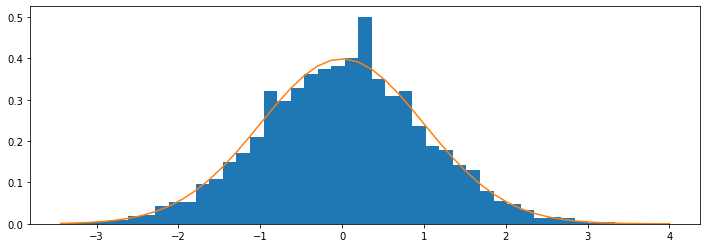

In [6]:
%%time
#np.random.seed(1492)
N, n = 10000, 2500
nbins = 45 # barras en el histograma

def posición_final():
    pasos = 2*bernoulli.rvs(p=0.5, size=[n])-1
    return pasos.sum()

posición = np.array([posición_final() for _ in range(N)])
z = posición/np.sqrt(n)

xx = np.linspace(z.min(),z.max(), nbins+1)
w = xx[1] - xx[0]

fig, ax = plt.subplots(figsize = [12,4])
plt.hist(posición/np.sqrt(n), bins=nbins, density=True);
plt.plot(xx, norm.pdf(xx), color='C1')

"""
# Esta versión del gráfico sirve para hacer una animación

bottom = np.zeros(nbins)
for zchunk in z.reshape([10, -1]):
    yvals = np.histogram(zchunk, bins=xx, density=False)[0] / N / w
    ax.bar(xx[:-1], yvals, bottom=bottom, color='C0', edgecolor='C0', align='edge', width=w)
    bottom += yvals

""";


## Usando la distribución binomial

Si recordamos que la suma de variables aleatorias de Bernoulli definen a la distribución binomial, podemos simular el resultado anterior de esta otra forma:


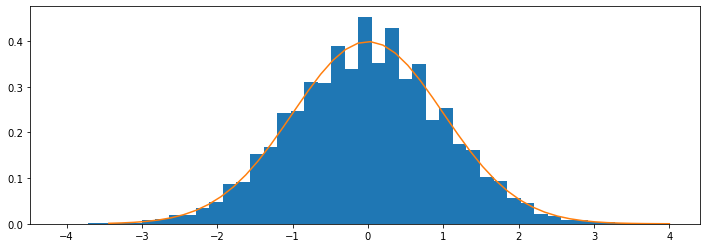

In [7]:
def posición_final():
    return 2*binom.rvs(p=0.5, n=n) - n

posición = np.array([posición_final() for _ in range(N)])


fig, ax = plt.subplots(figsize = [12,4])
plt.hist(posición/np.sqrt(n), bins=nbins, density=True);
plt.plot(xx, norm.pdf(xx), color='C1');

Los resultados no se ven idénticos porque utilizan otra muestra de lanzamientos de la moneda.

## ¿Por qué funciona?

Para demostrar que efectivamente el resultado de nuestro proceso converge a la distribución normal estándar, es conveniente trabajar con la función característica.

Recordemos que la función característica de una variable aleatoria $X$ está definida por $\phi_X(t) = E e^{itX}$.

En el caso del lanzamiento de la moneda es:

\begin{align*}
\phi_{X_i}(t) &= E e^{itX} \\
  &= 0.5e^{it(-1)} + 0.5e^{it(1)} \\
  &= 0.5\left(e^{-it} + e^{it}\right) \\
  &= \cos(t)
\end{align*}

Ahora bien, como la función característica de la suma de variables independientes es igual al producto de las funciones características individuales, encontramos

\begin{align*}
\phi_{Y_n}(t) &= \Pi_{i=1}^n \phi_{X_i}(t) \\
  &= \Pi_{i=1}^n \cos(t) \\
  &= \cos^n(t)
\end{align*}

Además, al multiplicar una variable aleatoria por una constante, su función característica se obtiene simplemente multiplicando $t$ por ese mismo escalar:

\begin{align*}
\phi_{Z_n}(t) &= \phi_{Y_i}\left(\frac{t}{\sqrt{n}}\right) \\
  &= \cos^n\left(\frac{t}{\sqrt{n}}\right)
\end{align*}

Tomando el límite para una muestra infinita


\begin{align*}
\lim_{n\to\infty}\phi_{Z_n}(t) = \lim_{n\to\infty} \cos^n\left(\frac{t}{\sqrt{n}}\right) = 1^{\infty}
\end{align*}

que es una forma indeterminada.

Por lo tanto, hacemos esta transformación para aplicar la regla de L'Hopital





\begin{align*}
\lim_{n\to\infty}\phi_{Z_n}(t) &= \lim_{n\to\infty} e^{n\ln \cos\left(\frac{t}{\sqrt{n}}\right)} \\
 &=  e^{\lim_{n\to\infty}n\ln \cos\left(\frac{t}{\sqrt{n}}\right)} \\
\end{align*}


Si definimos $m=\frac{t}{\sqrt{n}} \rightarrow n = \frac{t^2}{m^2}$ escribimos
\begin{align*}
\lim_{n\to\infty}\phi_{Z_n}(t) &= \exp\left(\lim_{m\to 0}\frac{t^2\ln \cos\left(m\right)}{m^2}\right) \\
&= \exp\left(\lim_{m\to 0}\frac{-t^2 \sin m}{2m\cos m}\right) \\
&= \exp\left(\lim_{m\to 0}\frac{-t^2 \cos m}{2\cos m - 2m\sin m}\right) \\
&= \exp\left(\frac{-t^2}{2}\right)
\end{align*}

que es la función característica de la distribución normal estándar.